In [5]:
% path_original_data = project_paths('IN_DATA');
path_original_data = '../original_data/';

path_financial_accounts = strcat(path_original_data, ...
                                 'Financial_accounts_original.csv');
path_business_gdp = strcat(path_original_data, ...
                           'business_value_added_nipa_original.csv');

In [13]:
financial_accounts_original = csvread(path_financial_accounts, 6, 1);
corporate_equities = financial_accounts_original(:, 1);
corporate_dividends = financial_accounts_original(:, 2);
farm_dividends = financial_accounts_original(:, 3);
prop_invest = financial_accounts_original(:, 4);
corporate_debt = financial_accounts_original(:, 5);
corporate_capital_consumption = financial_accounts_original(:, 6);
noncorporate_capital_consumption = financial_accounts_original(:, 7);
capital_expenditures = financial_accounts_original(:, 8);
business_gdp = (csvread(path_business_gdp, 7, 2, 'C8..IW8'))';
size(business_gdp)
size(capital_expenditures)

ans =

   255     1


ans =

   255     1


In [14]:
% Equity Payout is calculated as net dividends farm and nonfarm sector minus
% net increase in corporate equitiesminus proprietors’ net investment and
% normalized by Business GDP times 10 (to meet scale in the paper).
equity_payout.full_sample = (corporate_dividends + farm_dividends - corporate_equities - prop_invest)./(business_gdp * 10)

equity_payout = 

    full_sample: [255x1 double]


In [17]:
debt_repurchase.full_sample = (- corporate_debt)./(business_gdp * 10)

debt_repurchase = 

    full_sample: [255x1 double]


In [22]:
timeline.full_sample = 1952:0.25:2015.5
timeline.full_sample

timeline = 

    full_sample: [1x255 double]


ans =

   1.0e+03 *

  Columns 1 through 7

    1.9520    1.9523    1.9525    1.9527    1.9530    1.9532    1.9535

  Columns 8 through 14

    1.9538    1.9540    1.9543    1.9545    1.9547    1.9550    1.9552

  Columns 15 through 21

    1.9555    1.9558    1.9560    1.9563    1.9565    1.9567    1.9570

  Columns 22 through 28

    1.9572    1.9575    1.9578    1.9580    1.9583    1.9585    1.9587

  Columns 29 through 35

    1.9590    1.9592    1.9595    1.9598    1.9600    1.9603    1.9605

  Columns 36 through 42

    1.9607    1.9610    1.9612    1.9615    1.9618    1.9620    1.9623

  Columns 43 through 49

    1.9625    1.9627    1.9630    1.9632    1.9635    1.9638    1.9640

  Columns 50 through 56

    1.9643    1.9645    1.9647    1.9650    1.9652    1.9655    1.9658

  Columns 57 through 63

    1.9660    1.9663    1.9665    1.9667    1.9670    1.9672    1.9675

  Columns 64 through 70

    1.9678    1.9680    1.9683    1.9

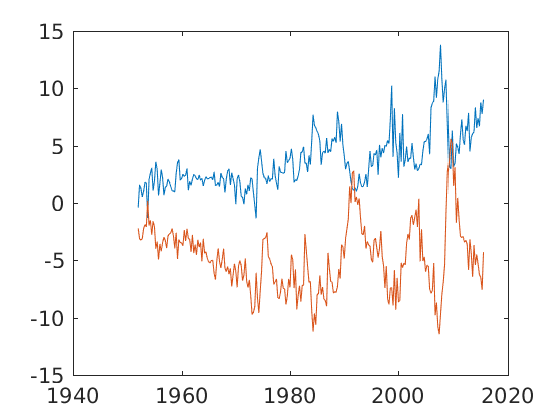

In [23]:
figure
plot(timeline.full_sample, equity_payout.full_sample)
hold on
plot(timeline.full_sample, debt_repurchase.full_sample)